<a href="https://colab.research.google.com/github/huang-yahui/yahui_microbit/blob/master/%5B20230809%5D_%E7%A0%94%E7%BF%92%E7%94%A8%E6%B1%BA%E7%AD%96%E6%A8%B9%E9%AB%94%E9%A9%97%E6%B4%BB%E5%8B%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第九章 決策樹實作

## 原始範例

請將請將wine.csv 傳到到colab後再執行！！

Accuracy of the classifier = 91.11 %
課堂練習答案：
[2.]
[1.]
[3.]
延伸練習：建立不同深度的決策樹分類器後的準確度變化，深度越淺，二元樹準確度越差
Accuracy of the classifier = 91.11 %


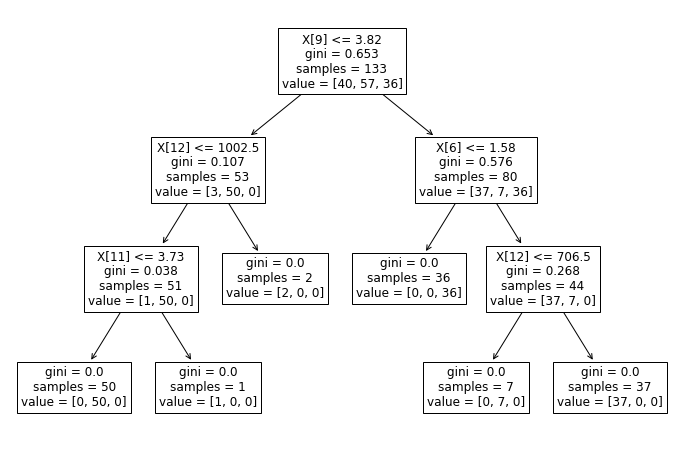

In [ ]:
# 導入需要套件
import numpy as np
import matplotlib.pyplot as plt  #1 載入畫圖用的套件
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  #2 載入畫出樹的套件

# 載入紅酒資料集，建立Target y與特徵資料 X
input_file = 'wine.csv'

X = []
y = []
with open(input_file) as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[1:])
        y.append(data[0])

X = np.array(X)
y = np.array(y)
# 分割訓練資料集與測試資料集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)
# 建立決策樹分類器，運用訓練資料集訓練分類器，接著預測測試資料集
classifier_DecisionTree = DecisionTreeClassifier()
classifier_DecisionTree.fit(X_train, y_train)
y_test_pred = classifier_DecisionTree.predict(X_test)
# 計算分類器的精確度
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

# 輸入資料預測分類
X_test1 =[[1.51, 1.73, 1.98, 20.15, 85, 2.2, 1.92, .32, 1.48, 2.94, 1, 3.57, 172]]
X_test2 = [[14.23, 1.71, 2.43, 15.6, 127, 2.8, 3.06, .28, 2.29, 5.64, 1.04, 3.92, 1065]]
X_test3 = [[13.71, 5.65, 2.45, 20.5, 95, 1.68, .61, .52, 1.06, 7.7, .64, 1.74, 720]]
print("課堂練習答案：")
print(classifier_DecisionTree.predict(X_test1))
print(classifier_DecisionTree.predict(X_test2))
print(classifier_DecisionTree.predict(X_test3))
# ==Output==
# Accuracy of the classifier = 91.11 %
# [2.]
# [1.]
# [3.]

# 建立不同深度的決策樹分類器，運用訓練資料集訓練分類器，接著預測測試資料集
print("延伸練習：建立不同深度的決策樹分類器後的準確度變化，深度越淺，二元樹準確度越差")
classifier_DecisionTree = DecisionTreeClassifier(max_depth=9) ##
classifier_DecisionTree.fit(X_train, y_train)
y_test_pred = classifier_DecisionTree.predict(X_test)
# 計算分類器的精確度
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")
# ==Output==
# Accuracy of the classifier = 88.89 %
plot_tree(classifier_DecisionTree,fontsize=12)  #3 準備畫樹，參數：樹, fontsize=字型大小
plt.gcf().set_size_inches(12, 8)   #4 設定畫布大小（寬x高）英吋
plt.show()                          #5 顯示決策樹

## [實作練習] 改用鳶尾花資料集來做決策樹

Accuracy of the classifier = 97.37 %


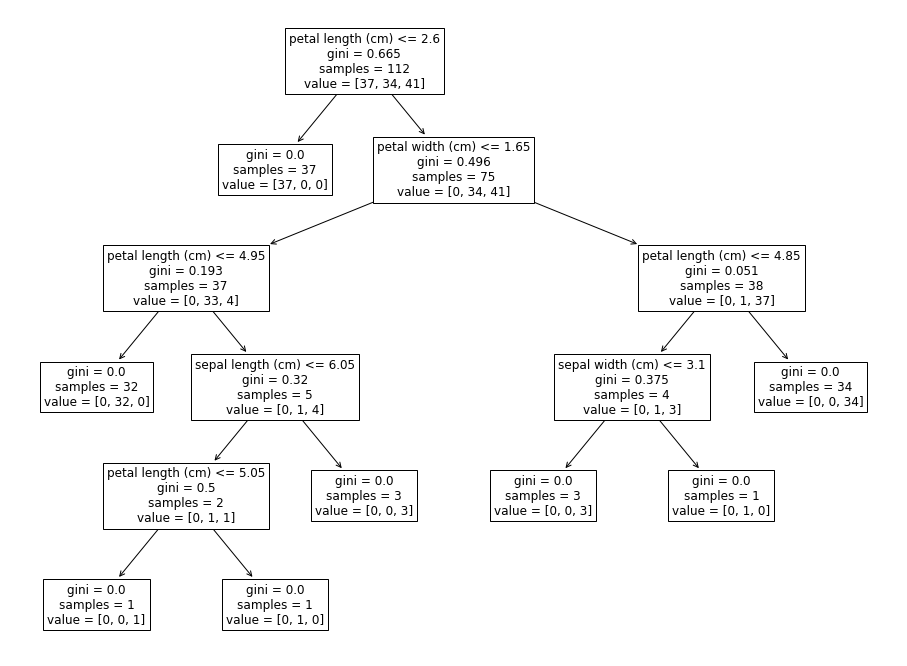

In [ ]:
# [實作練習] 用iris資料集來建立一棵樹吧
# 從 範例copy過來
import numpy as np
import matplotlib.pyplot as plt  #1. 載入畫圖用的套件
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  #2. 載入畫出樹的套件
#####################
# 自己動手做吧
from sklearn.datasets import load_iris  # 匯入鳶尾花資料
# １．載入 iris 的資料集
X = load_iris().data #  特徵值
y = load_iris().target # 類別
#print(load_iris().target_names)

# ２．訓練集 測試集分割
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size=0.25 ,
                                                                    random_state=1 )
# ３．模型的訓練（決策樹）
iris_dt = DecisionTreeClassifier() # 建立iris 的決策樹
iris_dt.fit(X_train,y_train) # 進行訓練

# ４．模型的驗證：計算iris分類器的精確度（從範例copy過來即可）
y_test_pred = iris_dt.predict(X_test)
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

# [補充] 畫出決策樹
plot_tree(iris_dt,  #3 畫出樹,參數：樹
          feature_names=load_iris().feature_names,  # feature_name=顯示的特徵名
          fontsize=12)  # fontsize=字型大小
plt.gcf().set_size_inches(16, 12)   #4
plt.show()                          #5

# 現場展示用

為節省時間不另外匯入 wine.csv；直接從Scikit-Learn的資料集

載入 紅酒資料(與wine.csv來源相同) `load_wine`指令。

測試準確率 93.33%


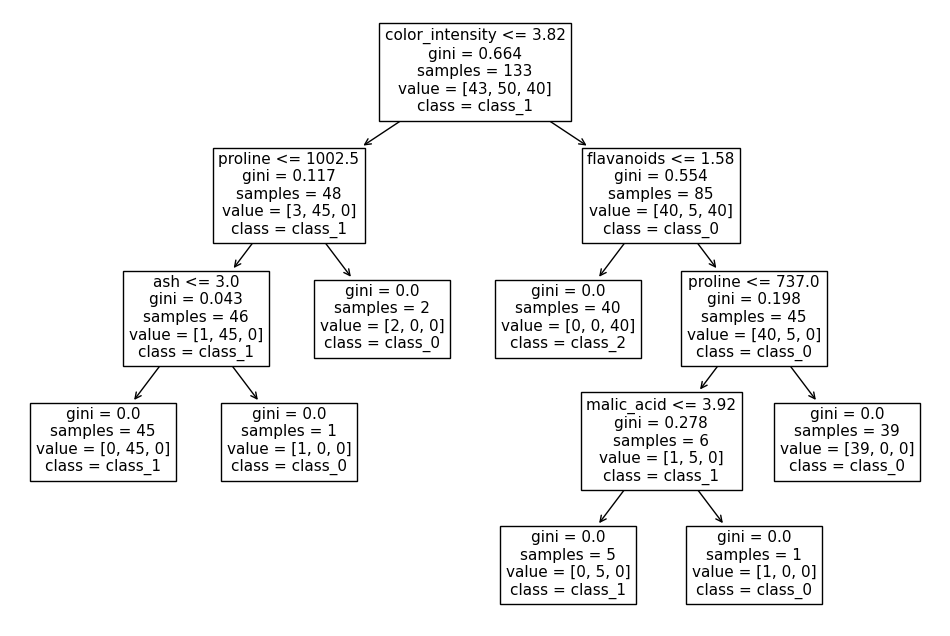

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [ ]:

# 導入需要套件
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # 繪製決策樹
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine # 紅酒資料

# 載入資料
X,y = load_wine().data , load_wine().target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
wine_dt = DecisionTreeClassifier(random_state=0)
wine_dt.fit(X_train,y_train)

# 印出準確率
print( '測試準確率 {:.2f}%'.format((wine_dt.predict(X_test)==y_test).sum()/X_test.shape[0]*100) )

# 決策樹繪圖的相關設定：
plot_tree(wine_dt,feature_names=load_wine().feature_names,class_names=load_wine().target_names,fontsize=11)
plt.gcf().set_size_inches(12, 8) # 修改畫布顯示大小
plt.show()


# [現場展示用] 20230809

## 利用表單結果來建決策樹

1. 先至google表單下載結果(存成.csv)
2. 上傳至colab
3. 載入中文字型[非必備]
4. 撰寫程式碼

---

## 示範程式碼流程
1. 載入需要套件
```python
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # 繪製決策樹
from matplotlib import pyplot as plt
```
2. 讀取檔案(此處用pandas)
```python
data = pd.read_csv(檔案)
```

3. 資料前處理，(取出標的欄位、刪除不需要的欄位)
```python
y = data.loc[:,"購買筆電與否"]
X = data.drop(columns=['時間戳記','購買筆電與否'])
```
4. [補充] 此次示範表單都是類別變項，需編碼轉換成數值變項方能給sklearn使用
<br>因此這邊的編碼要小心！年齡、收入可有連續性需依照順序編碼
```python
X.replace(['<=30','31~40','>40','高','中','低','是','否'],[0,1,2,2,1,0,1,0],inplace=True)
```
5. 建樹 [可補充 criterion='entropy' 參數]
```python
樹的名字 = DecisionTreeClassifier()
樹的名字.fit(X, y)
```

6. 繪圖：
```python
plot_tree(樹的名字,feature_names=X.columns,class_names=y,fontsize=11)
plt.gcf().set_size_inches(12, 8) # 修改畫布顯示大小
plt.show()
```

In [ ]:
# 來源 https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=GJWjDw-iNdCm
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-08-09 04:26:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.23.139, 74.125.23.102, 74.125.23.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nbsrkip1ut62cmev4psn4h24u8uqr91j/1691555100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=87d9f9c2-f550-4cad-b073-86c1ad1679d9 [following]
--2023-08-09 04:26:09--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nbsrkip1ut62cmev4psn4h24u8uqr91j/1691555100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=87d9f9c2-f550-4cad-b073-86c1ad1679d9
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0k-9o-d

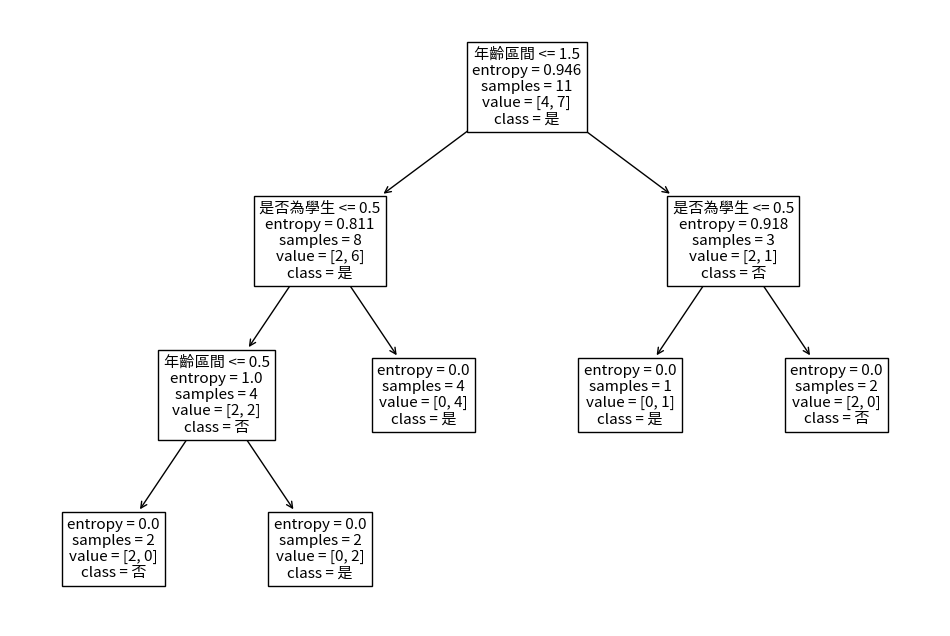

In [ ]:
# 示範程式 現場實作

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # 繪製決策樹
from matplotlib import pyplot as plt
# 讀取檔案(此處用pandas)
data = pd.read_csv('/content/20230809_ 資訊科技教師線上工作坊_決策樹實作活動 (回覆) - 表單回應 1.csv')

#資料前處理，(取出標的欄位、刪除不需要的欄位)
y = data.loc[:,"購買筆電與否"]
X = data.drop(columns=['時間戳記','購買筆電與否'])

#[補充] 此次示範表單都是類別變項，需編碼轉換成數值變項方能給sklearn使用
#因此這邊的編碼要小心！年齡、收入可有連續性需依照順序編碼
X.replace(['<=30','31~40','>40','高','中','低','是','否'],[0,1,2,2,1,0,1,0],inplace=True)

#建樹
nbdt = DecisionTreeClassifier(criterion='entropy')
nbdt.fit(X, y)

#繪圖：
plot_tree(nbdt,feature_names=X.columns,class_names=y,fontsize=11)
plt.gcf().set_size_inches(12, 8) # 修改畫布顯示大小
plt.show()
